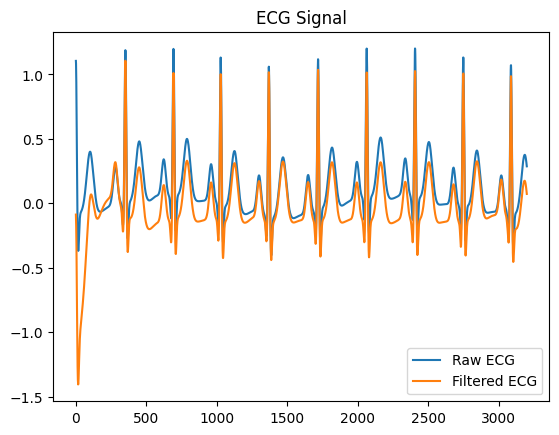

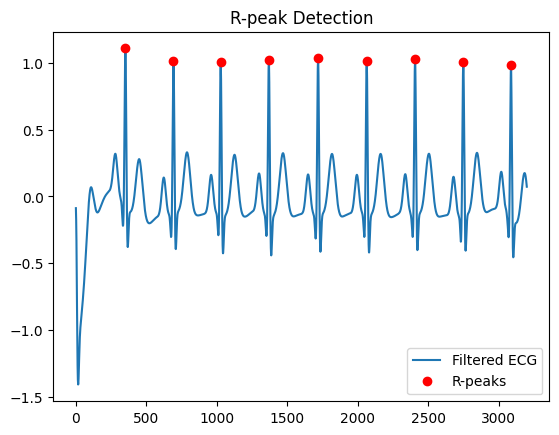

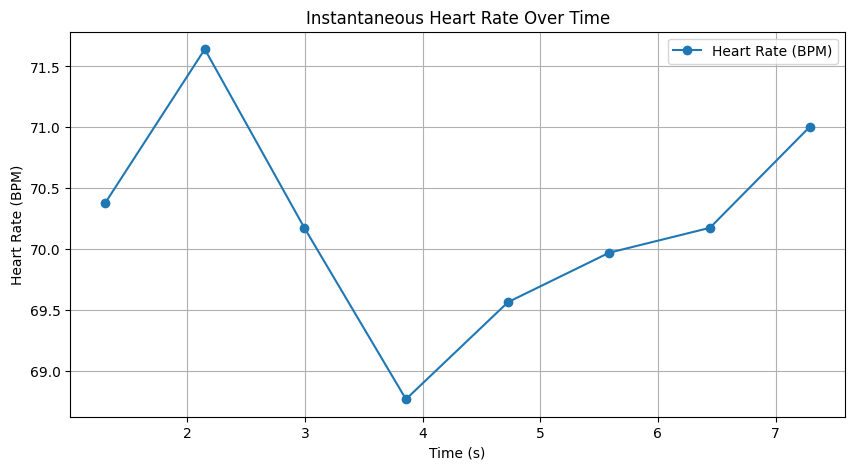

Average HR (BPM): 70.21047353136069


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
fs = 400  # Sampling rate
ecg = nk.ecg_simulate(duration=8, sampling_rate=fs)

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.8, 38, fs)

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

# Calculate Heart Rate
time_r_peaks = r_peaks / fs
rr_intervals = np.diff(time_r_peaks)
hr = 60 / rr_intervals
hr_time = (time_r_peaks[:-1] + time_r_peaks[1:]) / 2

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(hr_time, hr, 'o-', label='Heart Rate (BPM)')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Instantaneous Heart Rate Over Time')
plt.grid(True)
plt.legend()
plt.show()

average_hr = np.mean(hr)
print("Average HR (BPM):", average_hr)